Gustavo
Agente Reactivo

Completed: 25 steps
Run time: 0:00:00.017401
Simulation finished
Completed: 50 steps
Run time: 0:00:00.024931
Simulation finished
Completed: 75 steps
Run time: 0:00:00.027795
Simulation finished
Completed: 100 steps
Run time: 0:00:00.035044
Simulation finished


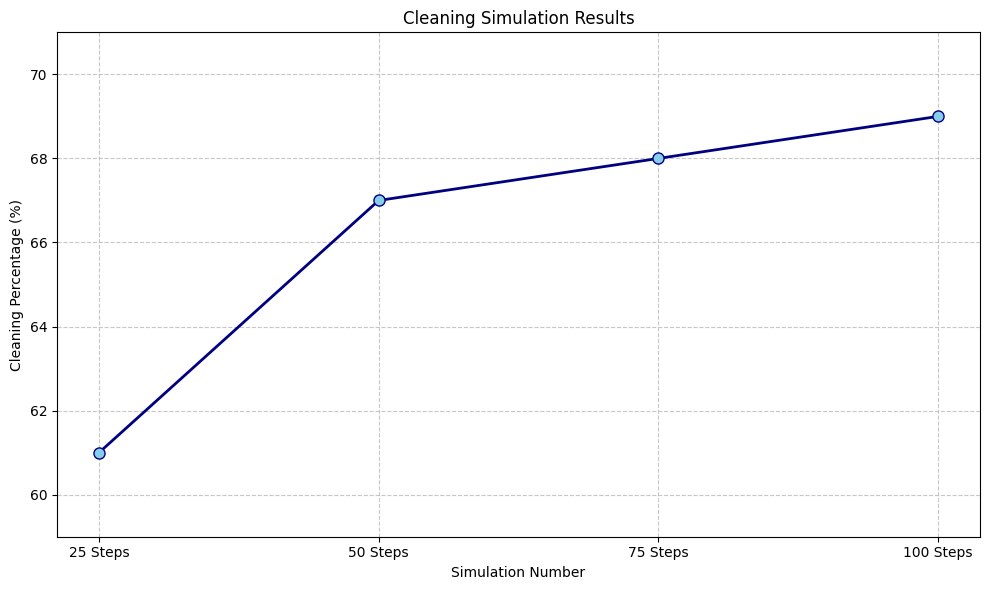

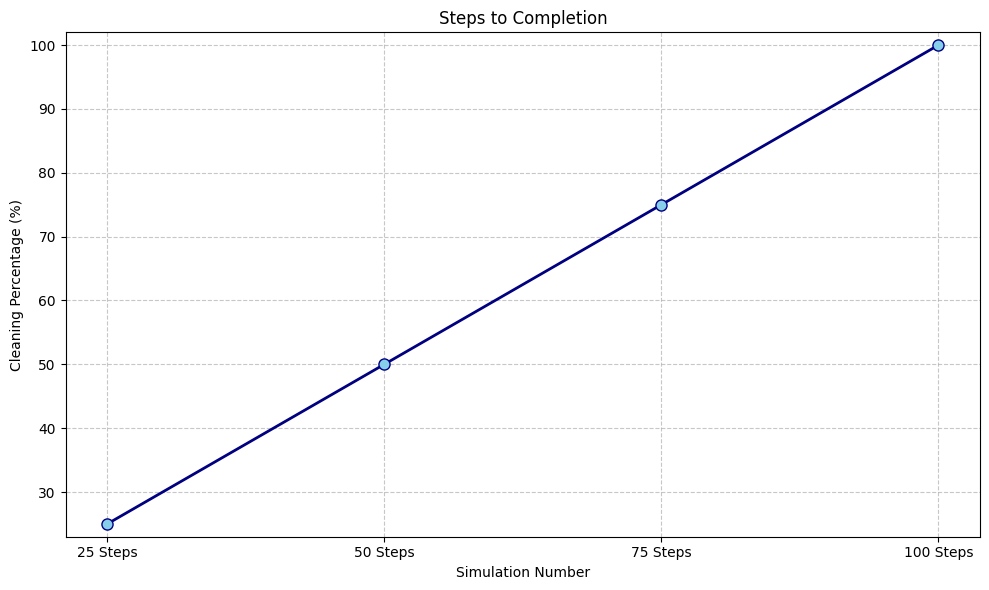

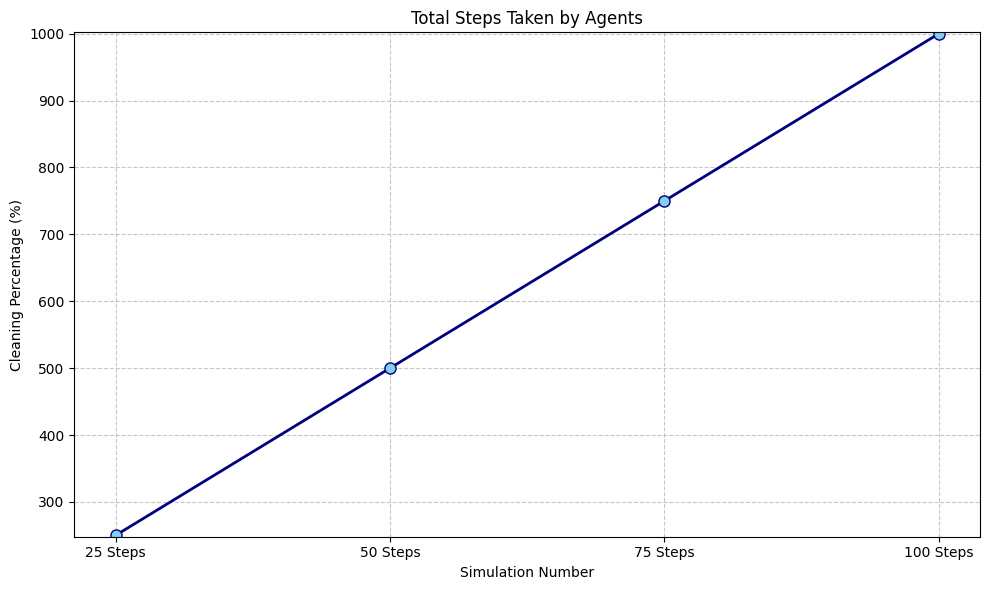

In [ ]:
# Model design
import agentpy as ap
import numpy as np
import pandas as pd

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt


class cleaningAgent(ap.Agent):
  def setup(self):
    self.step = 0
    self.cleaned = 0


  def see(self):
    x, y = self.model.grid.positions[self]
    return not self.model.grid.clean[x, y]

  def action(self):
    if self.see():
      self.model.grid.clean[self.model.grid.positions[self]] = True  # Mark as cleaned
      self.cleaned += 1



class CleaningModel(ap.Model):
  def setup(self):
    self.grid = ap.Grid(self, (self.p.x, self.p.y)) # Create the grid
    self.agents = ap.AgentList(self, self.p.agents, cleaningAgent) # Create the agents
    self.grid.add_agents(self.agents, positions=[(0, 0)] * self.p.agents) # Add agents to grid at 0,0
    
    # Dirty random spaces in grid
    # 3 hrs me tomo hacer esto *-*
    self.grid.add_field('clean', values=np.full(self.grid.shape, True))  # Default all clean
    stain_positions = np.random.choice(self.grid.shape[0] * self.grid.shape[1], self.p.stains, replace=False) # Creates a numpy ndarray with dirty spaces
    stain_indices = np.unravel_index(stain_positions, self.grid.shape)
    for i in range(len(stain_positions)):
      pos = (stain_indices[0][i], stain_indices[1][i])
      self.grid.clean[pos] = False

    self.cleanPercentage = []
    self.steps = -1


  def step(self):
    self.agents.action()
    self.agents.next()


  def update(self):
    #print(np.sum(self.grid.clean == True))
    cleanSpaces = np.sum(self.grid.clean == True)
    self.cleanPercentage.append(cleanSpaces)
    self.steps += 1

    if cleanSpaces == self.grid.shape[0] * self.grid.shape[1]:
      self.stop()


  def end(self):
    self.record('cleanPercentage')
    self.record('steps')
    self.agents.record('step')



parameters = [{
  'x': 10,       # Grid size in x axis
  'y': 10,       # Gird size in y axis
  'agents': 10,   # Agent Amount
  'stains': 50,   # Spots to clean
  'steps': 25,
}, {
  'x': 10,       # Grid size in x axis
  'y': 10,       # Gird size in y axis
  'agents': 10,   # Agent Amount
  'stains': 50,   # Spots to clean
  'steps': 50,
}, {
  'x': 10,       # Grid size in x axis
  'y': 10,       # Gird size in y axis
  'agents': 10,   # Agent Amount
  'stains': 50,   # Spots to clean
  'steps': 75,
}, {
  'x': 10,       # Grid size in x axis
  'y': 10,       # Gird size in y axis
  'agents': 10,   # Agent Amount
  'stains': 50,   # Spots to clean
  'steps': 100,
}]

simCleaned = []
simSteps = []
simAgentSteps = []

for i in parameters:
  model = CleaningModel(i)
  results = model.run()

  cleaned_spots = results.variables.CleaningModel['cleanPercentage'].sum()[-1]
  percent_cleaned = (cleaned_spots / (i['x'] * i['y'])) * 100

  simCleaned.append(percent_cleaned)
  simSteps.append(results.variables.CleaningModel['steps'])
  simAgentSteps.append(results.variables.cleaningAgent.sum())

#
# Graph made with Chatgpt
#

def plot_cleaning_results(results, title):
    """
    Plot cleaning simulation results as a line graph with markers.
    
    Parameters:
    results (list): List of cleaning percentages from simulations
    title (str): Title for the plot
    """
    # Convert results to numpy array if not already
    results = np.array(results)
    
    # Create figure and axis
    fig, ax = plt.subplots(figsize=(10, 6))
    
    # Create x-axis positions
    x_pos = np.arange(len(results))
    
    # Create line plot with markers
    line = ax.plot(x_pos, results, 
                  marker='o',  # Add markers at data points
                  linestyle='-',  # Solid line
                  linewidth=2,
                  markersize=8,
                  color='navy',
                  markerfacecolor='skyblue',
                  markeredgecolor='navy')
    
    # Customize the plot
    ax.set_ylabel('Cleaning Percentage (%)')
    ax.set_xlabel('Simulation Number')
    ax.set_title(title)
    
    # Set x-axis ticks
    ax.set_xticks(x_pos)
    ax.set_xticklabels(['25 Steps', '50 Steps', '75 Steps', '100 Steps'])
    
    # Add grid for better readability
    ax.grid(True, linestyle='--', alpha=0.7)
    
    # Set y-axis limits to better show differences
    ax.set_ylim([min(results) - 2, max(results) + 2])
    
    
    # Adjust layout to prevent label cutoff
    plt.tight_layout()
    
    return fig, ax

# Example usage with your data
fig, ax = plot_cleaning_results(simCleaned, title="Cleaning Simulation Results")
plt.show()

fig, ax = plot_cleaning_results(simSteps, title="Steps to Completion")
plt.show()

fig, ax = plot_cleaning_results(simAgentSteps, title="Total Steps Taken by Agents")
plt.show()